In [ ]:
from sklearn.datasets import fetch_openml
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
###
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd

## Download and Load the Data

In [ ]:
# You can add your dataframe here
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Dlabs_Internship/Test_data/customer traction/output.csv")

Mounted at /content/gdrive


FileNotFoundError: ignored

"[Traction] growth rate","[Traction] word count",

In [ ]:
col_to_keep = ['Website Link', 'App Link', 'Team Size', 'revenue slab',
       'VC funded', 'Angle funding / Seed funding', 'B2B', 'Crowd funded', 'Bootstrapped',
       'Product is not live yet', 'B2C', 'C2C', 'B2B2C', 'Govt. funded', "[Traction] app downloads",
       'Bank funded / Loan', 'Incubator/Accelerator funded', "[Traction] # user",
       'Collected from worksheet',"[Traction] Less than 2" ,"[Brief] word count", 
        "[Traction] More than 2","[Traction] makes sense", 'Label']
X = col_to_keep[:-1]
y = col_to_keep[-1]
df = df[col_to_keep]

In [ ]:
col_to_keep = ['Website Link', 'App Link', 'Team Size', 'revenue slab',
       'VC funded', 'Angle funding / Seed funding', 'B2B', 'Crowd funded', 'Bootstrapped',
       'Product is not live yet', 'B2C', 'C2C', 'B2B2C', 'Govt. funded', "[Traction] app downloads",
       'Bank funded / Loan', 'Incubator/Accelerator funded', "[Traction] # user",
       'Collected from worksheet',"[Traction] Less than 2" ,"[Brief] word count", 
        "[Traction] More than 2","[Traction] makes sense", 'Label']
for i in col_to_keep:
  print(i)

Website Link
App Link
Team Size
revenue slab
VC funded
Angle funding / Seed funding
B2B
Crowd funded
Bootstrapped
Product is not live yet
B2C
C2C
B2B2C
Govt. funded
[Traction] app downloads
Bank funded / Loan
Incubator/Accelerator funded
[Traction] # user
Collected from worksheet
[Traction] Less than 2
[Brief] word count
[Traction] More than 2
[Traction] makes sense
Label


In [ ]:
df[X]

,Website Link,App Link,Team Size,revenue slab,VC funded,Angle funding / Seed funding,B2B,Crowd funded,Bootstrapped,Product is not live yet,...,Govt. funded,[Traction] app downloads,Bank funded / Loan,Incubator/Accelerator funded,[Traction] # user,Collected from worksheet,[Traction] Less than 2,[Brief] word count,[Traction] More than 2,[Traction] makes sense
0,1,1,10,5.0,0,0,1,0,1,0,...,0,1000,0,0,10,2021,0,1.035714,1,0
1,1,0,10,62.5,0,0,1,0,1,0,...,0,0,0,0,0,2021,1,0.017857,0,1
2,1,0,15,5.0,0,0,1,0,1,0,...,0,0,0,0,0,2021,0,2.357143,1,1
3,1,0,10,15.0,0,0,0,0,1,0,...,0,0,0,0,0,2021,0,1.035714,1,0
4,1,0,10,500.0,0,0,1,0,0,0,...,0,0,0,0,0,2021,0,1.017857,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,1,1,10,0.0,0,0,1,0,0,0,...,0,0,0,0,0,2017,0,1.642857,1,0
5437,1,0,10,0.0,0,0,0,0,0,0,...,0,0,0,0,0,2017,1,2.803571,0,1
5438,1,0,10,15.0,0,1,1,0,0,0,...,0,0,0,0,0,2017,0,0.642857,1,0
5439,0,0,30,0.0,0,0,0,0,0,0,...,0,0,0,0,0,2017,1,0.017857,0,1


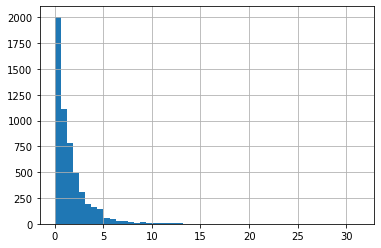

In [ ]:
df["[Brief] word count"].hist(bins=50)

In [ ]:
# Repeat data to force it to learn
repeat = {"revenue slab1":"revenue slab" , "[Traction] # user2":"[Traction] # user","[Brief] word count1":"[Brief] word count" }
for i in repeat:
  df[i] = df[repeat[i]]

#SMOTE

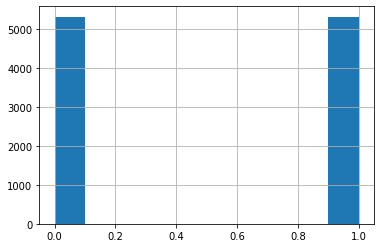

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(k_neighbors=10).fit_resample(df[X], df[y])
df_new = X_resampled
df_new["Label"] = y_resampled
df_new = shuffle(df_new).reset_index()
df_new["Label"].hist()

# Models

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    df_new[X], df_new[y], test_size=1/7.0, random_state=0)

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
# model = LogisticRegression(solver = 'liblinear')
# model.fit(train_img, train_lbl)
# score = model.score(test_img, test_lbl)
# print(score)

In [ ]:
# model = SVC(gamma='auto')
# model.fit(train_img, train_lbl)
# score = model.score(test_img, test_lbl)
# print(score)

In [ ]:
# model = DecisionTreeClassifier(random_state=0)
# model.fit(train_img, train_lbl)
# score = model.score(test_img, test_lbl)
# print(score)

In [ ]:
model = RandomForestClassifier(n_estimators = 50, max_depth=2, random_state=0)
model.fit(train_img, train_lbl)
score = model.score(test_img, test_lbl)
print(score)

0.8201581027667985


In [ ]:
# model = KNeighborsClassifier(n_neighbors=3)
# model.fit(train_img, train_lbl)
# score = model.score(test_img, test_lbl)
# print(score)

## Recall

In [ ]:
# synthetic data + real
from sklearn.metrics import recall_score

y_pred = model.predict(test_img)
y_true = test_lbl
recall_score(y_true, y_pred, average='weighted')

0.8201581027667985

In [ ]:
# REAL DATA
# for x in range(1,110,10):
#   x = x/100
#   print("------",int(len(df)*x), "-------")
#   df_f = df.head(int(len(df)*x))
#   y_pred = model.predict(df_f[X])
#   y_true = df_f[y]
#   # recall_score(y_true, y_pred, average='binary')
#   print(x, ": ", recall_score(y_true, y_pred, average='binary'))
y_pred = model.predict(df[X])
y_true = df[y]
recall_score(y_true, y_pred, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7757765116706488

## F1

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred, average='weighted')


0.8537096061296167

#AUC curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.savefig('/content/gdrive/MyDrive/Dlabs_Internship/Test_data/Data balence/ROC.png')

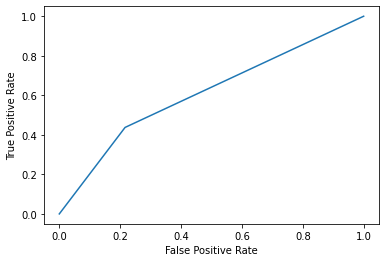

In [ ]:
plot_roc_curve(y_true, y_pred)

In [ ]:
# sum(y_pred) 
sum(y_pred)
# Ydat = pd.DataFrame(y_pred, columns=['prediction'])

1204

In [ ]:
df['prediction'] = y_pred 

In [ ]:
u1, u2 = df['Label'].to_numpy(), df['prediction'].to_numpy()
print(u1.dot(u2))
# u.to_csv("/content/gdrive/MyDrive/Dlabs_Internship/Test_data/Data balence/Corr.csv")

56


In [ ]:
c = 0
for i in range(len(df)):
  if u1[i] and u2[i]:
    c += 1
c 

56

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define Parameters
# max_depth=range(1,21,4)
# n_estimators = range(1,100,20)
# param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# # Build the grid search
# dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
# grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5, scoring = 'recall')
# grid_results = grid.fit(train_img, train_lbl)

# # Summarize the results in a readable format
# print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
# results_df = pd.DataFrame(grid_results.cv_results_)
# results_df

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(model,open("/content/gdrive/MyDrive/Dlabs_Internship/Test_data/Data balence/Model.pkl","wb"))

In [ ]:
#Feature importance estimator
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#Pick the most important features (Features 1 to 3) and then scale them by the max value to get a score b/w 0 and 1
#For Feature 1- score will b/w 0-1
#For Feature 2- score will b/w 0-1
#For Feature 3- score will b/w 0-1
#For Feature 4- score will b/w 0 or 1 (Random forest prediction)
